In [41]:
import pandas as pd
_8Hz_signal = pd.read_csv("./csv_from_xdf/8Hz_0001_filtered.csv")
p3_8 = _8Hz_signal['P3'].to_numpy()
p4_8 = _8Hz_signal['P4'].to_numpy()
t_8 = _8Hz_signal['Time'].to_numpy()

_9Hz_signal = pd.read_csv("./csv_from_xdf/ssvep_data_9Hz_raw.csv")
p3_9 = _9Hz_signal['P3'].to_numpy()
p4_9 = _9Hz_signal['P4'].to_numpy()
t_9 = _9Hz_signal['Time'].to_numpy()

_10Hz_signal = pd.read_csv("./csv_from_xdf/ssvep_data_10Hz_raw.csv")
p3_10 = _10Hz_signal['P3'].to_numpy()
p4_10 = _10Hz_signal['P4'].to_numpy()
t_10 = _10Hz_signal['Time'].to_numpy()

_11Hz_signal = pd.read_csv("./csv_from_xdf/ssvep_data_11Hz_raw.csv")
p3_11 = _11Hz_signal['P3'].to_numpy()
p4_11 = _11Hz_signal['P4'].to_numpy()
t_11 = _11Hz_signal['Time'].to_numpy()

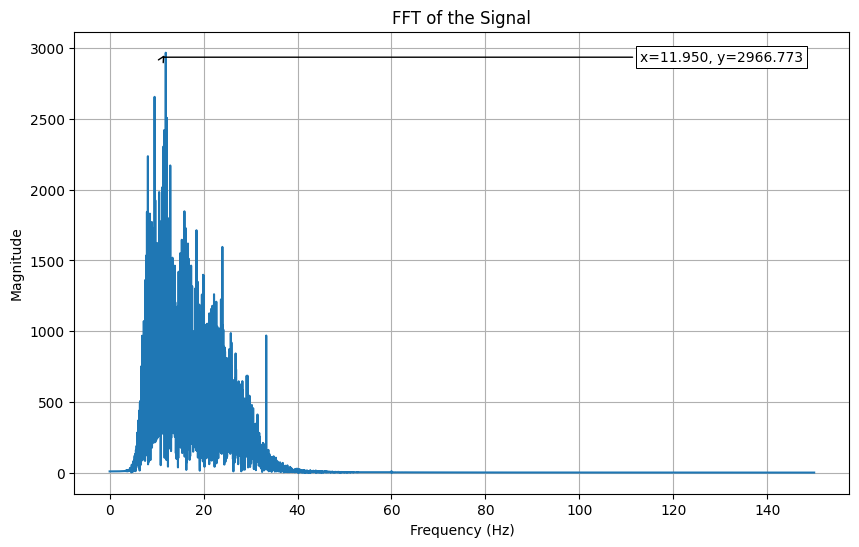

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to create a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply a bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

fs = 300
signal = p4_9
# Define the bandpass filter parameters
lowcut = 7.0  # Lower bound of the bandpass filter (Hz)
highcut = 30.0  # Upper bound of the bandpass filter (Hz)
order = 4  # Order of the filter

# Apply the bandpass filter to the signal
filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order)
signal = filtered_signal
N = len(signal)
fft_values = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(N, 1/fs)

# Only keep the positive frequencies
positive_freq_indices = np.where(fft_freq >= 0)
fft_freq = fft_freq[positive_freq_indices]
fft_values = fft_values[positive_freq_indices]

# Compute the magnitude of the FFT
fft_magnitude = np.abs(fft_values)

# Plot the FFT result
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, fft_magnitude)
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(fft_freq, fft_magnitude)
plt.show()